In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,8)

In [3]:
def read_show(filename1, filename2, display=False):
    img1=cv2.imread(filename1)
    img2=cv2.imread(filename2)

    img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    if display:
        f, ax=plt.subplots(1,2)
        ax[0].imshow(img1)
        ax[1].imshow(img2)
        plt.show()
        return

    return img1, img2

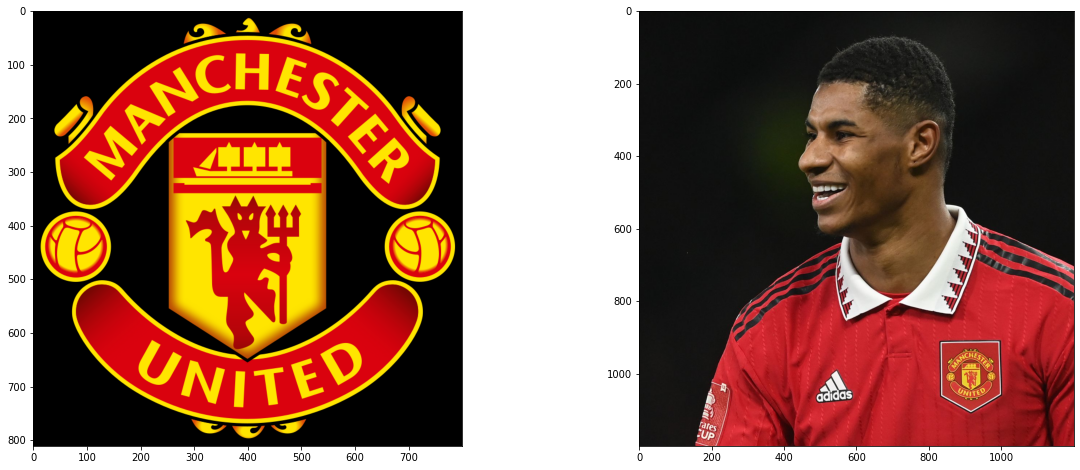

In [4]:
read_show('./images/man utd.png', './images/rashy.jpg', display=True)

In [5]:
def feature_matching(filename1, filename2):
    img1,img2=read_show(filename1, filename2)
    gray1=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray2=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    sift=cv2.SIFT_create()
    keypoints1, descriptor1=sift.detectAndCompute(gray1, None)
    keypoints2, descriptor2=sift.detectAndCompute(gray2, None)

    bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches=bf.match(descriptor1, descriptor2)

    matches=sorted(matches, key=lambda x:x.distance)
    img3=cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], img2, flags=2)

    plt.imshow(img3)
    plt.show()

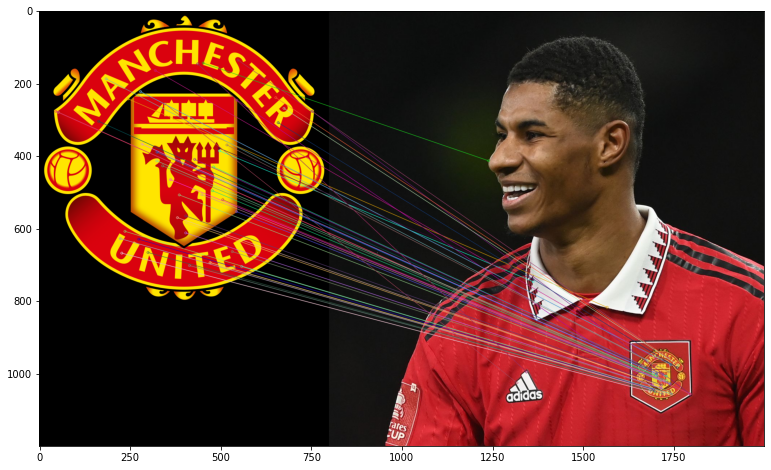

In [6]:
feature_matching('./images/man utd.png', './images/rashy.jpg')